In [1]:
import sys
import fastai
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
df = pd.read_csv('train_clean.csv')
df.head()

,filename,label
0,Images/train/0.png,4
1,Images/train/1.png,9
2,Images/train/2.png,1
3,Images/train/3.png,7
4,Images/train/4.png,3


In [3]:
path = '/home/th3lourde/Documents/AI/fast.ai/course-v3/nbs/my_files/Train_UQcUa52'

In [5]:
tfms = get_transforms(do_flip=False)

In [8]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

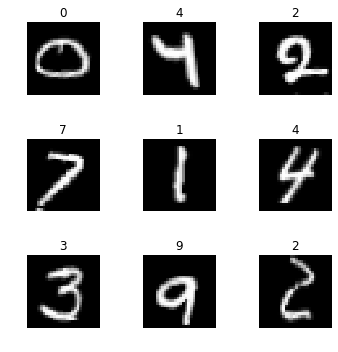

In [10]:
data.show_batch(rows=3, figsize=(5,5))

In [14]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.558549,0.380935,0.874898,02:50
1,0.332195,0.203243,0.934388,02:53
2,0.244699,0.160839,0.948776,02:54
3,0.195149,0.110875,0.963980,02:53
4,0.173914,0.117444,0.963061,02:52
5,0.153862,0.080814,0.974592,02:54
6,0.140007,0.071153,0.975714,02:53
7,0.115906,0.064160,0.979286,02:53


In [15]:
learn.save('resnet18')

In [66]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.442568,0.278978,0.911837,04:49
1,0.251666,0.148505,0.954388,04:54
2,0.212469,0.121354,0.961837,04:55
3,0.153844,0.098625,0.967959,04:55
4,0.133248,0.080935,0.972755,04:57
5,0.120980,0.066679,0.977755,04:55
6,0.102485,0.064281,0.979286,04:55
7,0.090248,0.052087,0.983980,04:54
8,0.114680,0.048027,0.985510,04:54
9,0.087841,0.043189,0.986633,04:50


In [67]:
## Time to get our guesses for the images
# from os import listdir
# from os.path import isfile, join
import glob
import re

guess_df = pd.DataFrame(columns = ['filename','label'])

# print(guess_df.head())

image_test_list = glob.glob("/home/th3lourde/Documents/AI/fast.ai/course-v3/nbs/my_files/Train_UQcUa52/Images/test/*")

for i in range(len(image_test_list)):

    img = open_image(image_test_list[i])

    pred_class,pred_idx,outputs = learn.predict(img)

    file_name = re.findall("\d{1,5}.png", image_test_list[i])

    guess = str(file_name[0])+','+str(pred_class)

    ### Write Guess To DF

    guess_df = guess_df.append({'filename' : str(file_name[0]) , 'label' : str(pred_class)}, ignore_index=True)


guess_df.head()



# print("file name: {} class: {}".format(image_test_list[0], pred_class))



# print(image_test_list)







,filename,label
0,67683.png,9
1,49414.png,2
2,56722.png,7
3,52830.png,4
4,54590.png,1


In [70]:
guess_df.to_csv('model_tests.csv', index=False)
# guess_df.head()
# guess_df.shape

In [13]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit(1)
learn.save('resnet50')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/th3lourde/.torch/models/resnet50-19c8e357.pth
102502400it [00:02, 35401438.97it/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.416229,0.296089,0.904388,06:00


In [ ]:
## Time to test said data